<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    THE ANALYSIS OF THE MOBILE PHONE MARKET AT MOBILE CITY STORE
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>


---

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA EXPLORATION
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>

---

# Thư viện

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ast

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Sử dụng data đã được xử lý

In [2]:
# Đọc file csv
data = pd.read_csv('../data/processed_data.csv', index_col=0)

# Chuyển đổi object thành list
data["do_phan_giai_cam_truoc"] = data["do_phan_giai_cam_truoc"].apply(ast.literal_eval)
data["do_phan_giai_cam_sau"] = data["do_phan_giai_cam_sau"].apply(ast.literal_eval)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8662 entries, 0 to 8661
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ten                     8662 non-null   object 
 1   loai_dien_thoai         8662 non-null   object 
 2   thoi_gian_bao_hanh      8662 non-null   float64
 3   danh_gia                8662 non-null   float64
 4   so_luong_binh_luan      8662 non-null   int64  
 5   duong_dan               8662 non-null   object 
 6   mau_sac                 8376 non-null   object 
 7   gia_moi                 7148 non-null   float64
 8   gia_cu                  5083 non-null   float64
 9   he_dieu_hanh            8662 non-null   object 
 10  cpu                     8647 non-null   object 
 11  ram                     8646 non-null   float64
 12  bo_nho_trong            8362 non-null   float64
 13  dung_luong_pin          8462 non-null   float64
 14  thiet_ke                8546 non-null   objec

,ten,loai_dien_thoai,thoi_gian_bao_hanh,danh_gia,so_luong_binh_luan,duong_dan,mau_sac,gia_moi,gia_cu,he_dieu_hanh,cpu,ram,bo_nho_trong,dung_luong_pin,thiet_ke,hang_dien_thoai,kich_thuoc_man_hinh,tan_so_quet,do_sang_man_hinh,loai_man_hinh,so_the_sim,loai_pin,cong_suat_sac,do_phan_giai_cam_sau,do_phan_giai_cam_truoc
0,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",LG,6.0,5.0,1191,https://mobilecity.vn/lg/lg-g7-cu.html,Xám,1750000.0,2950000.0,Android 8,Qualcomm SDM845 Snapdragon 845 (10 nm)\n8 nhân...,4.0,64.0,3000.0,Khung nhôm\nMặt trước kính Gorilla Glass 5\nMặ...,LG,6.1,NaN,NaN,LCD,2,NaN,18.0,"[16.0, 16.0]",[8.0]
1,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",LG,6.0,5.0,1191,https://mobilecity.vn/lg/lg-g7-cu.html,Xám,2050000.0,2950000.0,Android 8,Qualcomm SDM845 Snapdragon 845 (10 nm)\n8 nhân...,6.0,128.0,3000.0,Khung nhôm\nMặt trước kính Gorilla Glass 5\nMặ...,LG,6.1,NaN,NaN,LCD,2,NaN,18.0,"[16.0, 16.0]",[8.0]
2,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",LG,6.0,5.0,1191,https://mobilecity.vn/lg/lg-g7-cu.html,Trắng,1750000.0,2950000.0,Android 8,Qualcomm SDM845 Snapdragon 845 (10 nm)\n8 nhân...,4.0,64.0,3000.0,Khung nhôm\nMặt trước kính Gorilla Glass 5\nMặ...,LG,6.1,NaN,NaN,LCD,2,NaN,18.0,"[16.0, 16.0]",[8.0]
3,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",LG,6.0,5.0,1191,https://mobilecity.vn/lg/lg-g7-cu.html,Trắng,2050000.0,2950000.0,Android 8,Qualcomm SDM845 Snapdragon 845 (10 nm)\n8 nhân...,6.0,128.0,3000.0,Khung nhôm\nMặt trước kính Gorilla Glass 5\nMặ...,LG,6.1,NaN,NaN,LCD,2,NaN,18.0,"[16.0, 16.0]",[8.0]
4,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",LG,6.0,5.0,1191,https://mobilecity.vn/lg/lg-g7-cu.html,Xanh,1750000.0,2950000.0,Android 8,Qualcomm SDM845 Snapdragon 845 (10 nm)\n8 nhân...,4.0,64.0,3000.0,Khung nhôm\nMặt trước kính Gorilla Glass 5\nMặ...,LG,6.1,NaN,NaN,LCD,2,NaN,18.0,"[16.0, 16.0]",[8.0]


# Câu hỏi: Phân tích tương quan giữa: Giá, Dung lượng pin, RAM, Bộ nhớ trong, Kích thước màn hình

## Mục đích

## Tiền xử lý

In [3]:
df = data[["gia_moi", "dung_luong_pin", "ram", "bo_nho_trong", "kich_thuoc_man_hinh"]].copy()#.dropna()
df = df.corr()

## Trực quan hóa

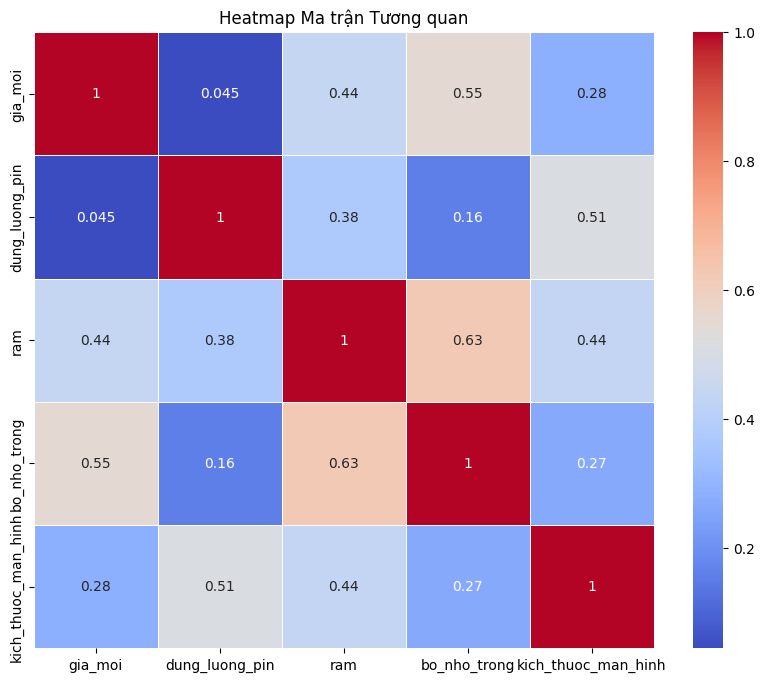

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Ma trận Tương quan")
plt.show()

## Nhận xét

# Câu hỏi: Mối quan hệ giữa Giá và các thuộc tính: RAM, Bộ nhớ trong

## Mục đích

## Tiền xử lý

In [5]:
df = data[["gia_moi", "ram", "bo_nho_trong"]].copy()#.drop_duplicates()
df.head()

,gia_moi,ram,bo_nho_trong
0,1750000.0,4.0,64.0
1,2050000.0,6.0,128.0
2,1750000.0,4.0,64.0
3,2050000.0,6.0,128.0
4,1750000.0,4.0,64.0


## Trực quan hóa

> Biểu đồ hồi quy

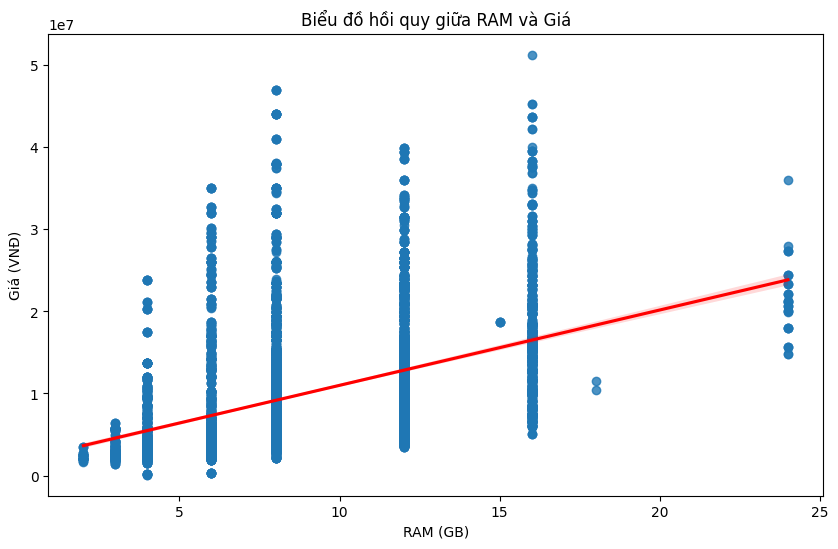

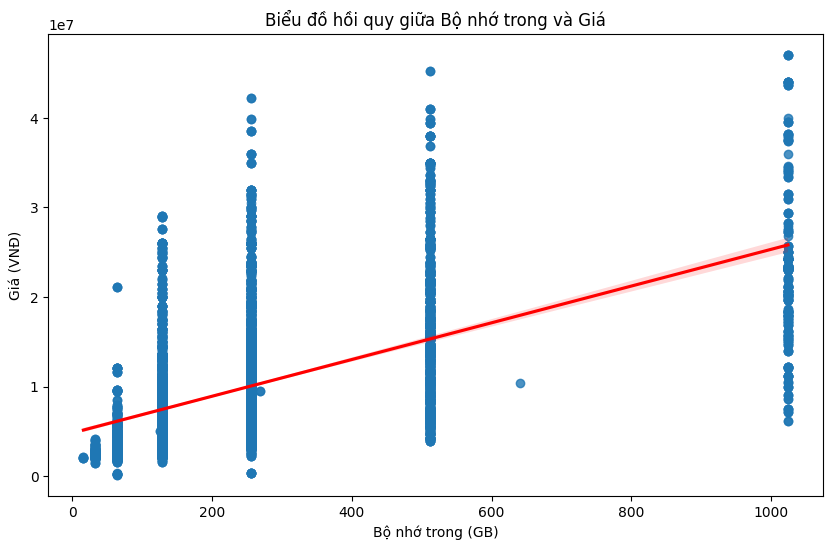

In [6]:
# Biểu đồ hồi quy cho RAM và Giá
plt.figure(figsize=(10, 6))
sns.regplot(x='ram', y='gia_moi', data=df, line_kws={"color": "red"})
plt.title('Biểu đồ hồi quy giữa RAM và Giá')
plt.xlabel('RAM (GB)')
plt.ylabel('Giá (VNĐ)')
plt.show()

# Biểu đồ hồi quy cho Bộ nhớ và Giá
plt.figure(figsize=(10, 6))
sns.regplot(x='bo_nho_trong', y='gia_moi', data=df, line_kws={"color": "red"})
plt.title('Biểu đồ hồi quy giữa Bộ nhớ trong và Giá')
plt.xlabel('Bộ nhớ trong (GB)')
plt.ylabel('Giá (VNĐ)')
plt.show()

> Biểu đồ boxplot

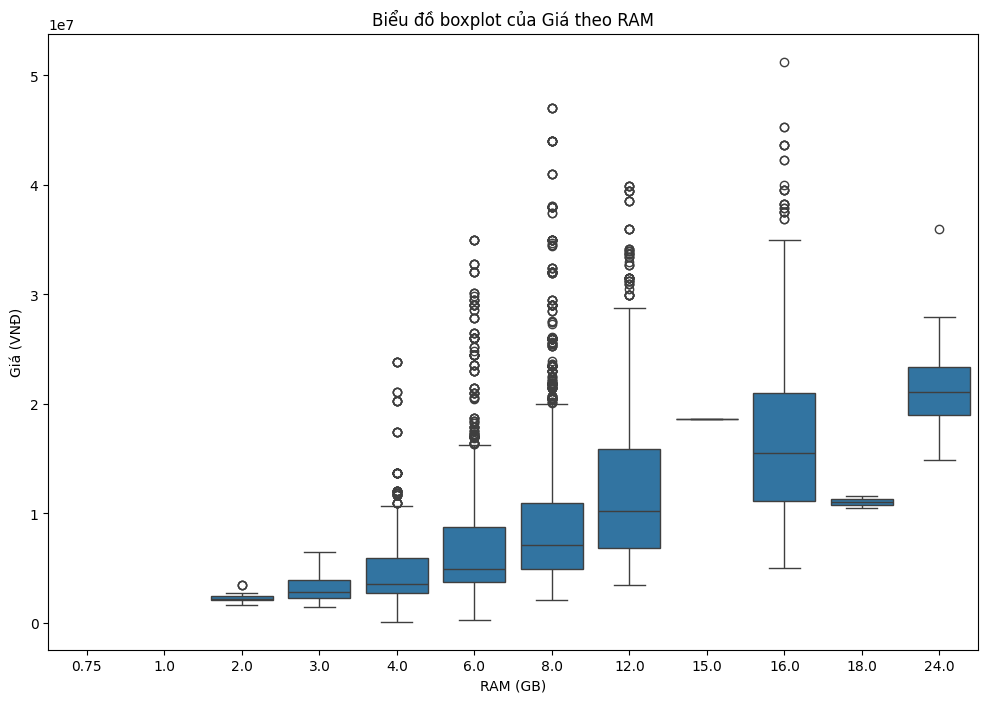

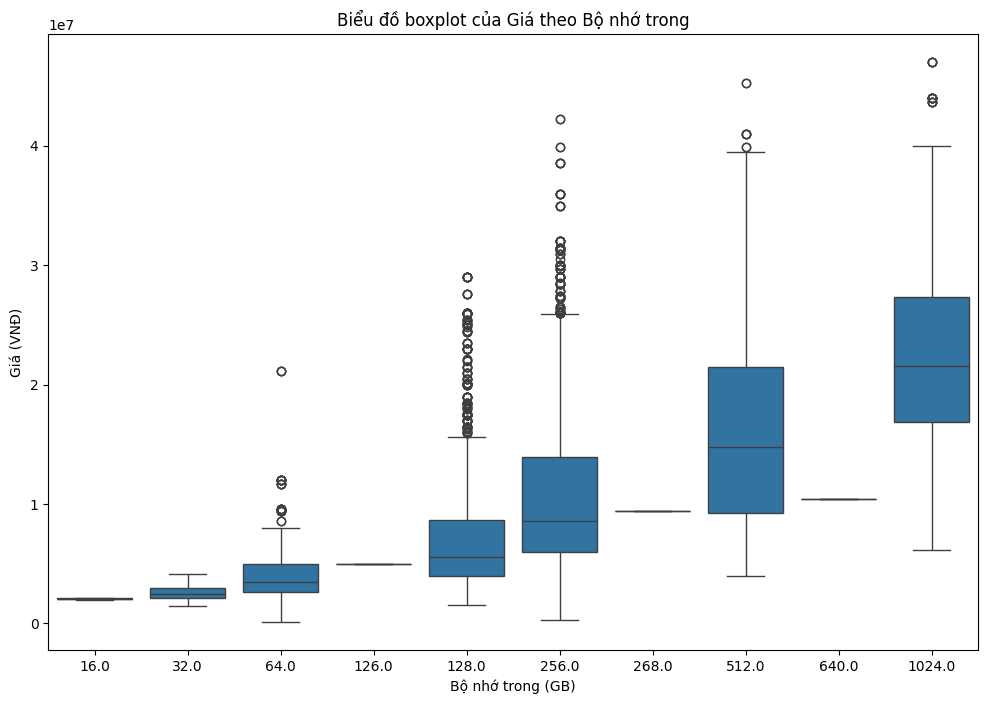

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='ram', y='gia_moi', data=df)
plt.title('Biểu đồ boxplot của Giá theo RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Giá (VNĐ)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='bo_nho_trong', y='gia_moi', data=df)
plt.title('Biểu đồ boxplot của Giá theo Bộ nhớ trong')
plt.xlabel('Bộ nhớ trong (GB)')
plt.ylabel('Giá (VNĐ)')
plt.show()

## Nhận xét